<a href="https://colab.research.google.com/github/AntonioHallgass/corso_AI_2025/blob/main/esame_30.6/MetodiAIFisica_ApplicazioniFisicheML_2025_ProvaPratica_30_6_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova Pratica - Metodi AI per la fisica e Applicazioni Fisiche al ML
### 30.6.2026 - AA 2024/25 - Docenti: S. Giagu e A. Ciardiello

---

**Regole:**

*   **tempo a disposizione:** 3.0h

*   compilare con i vostri dati i campi della cella che segue e poi eseguire la cella verificando che i dati printati corrispondano. L'esecuzione della cella scarica contesualmente il dataset da utilizzare durante la prova;
*   risolvere i quesiti/compiti indicati nella cella *Descrizione del compito*.
*   una volta completato il compito scaricare il notebook in formato *.ipynb* e caricarlo usando il form:
[consegna notebook](https://docs.google.com/forms/d/e/1FAIpQLSekkv2tTVIIAyY15lc3a4px_yjxoQJ6INr6CuWiXNw1GccJoQ/viewform?usp=dialog)<p>


**NOTA 1:** per scaricare localmente il notebook da colab: menù **File->Dowload->Download .ipynb** (non è necessario cambiare il nome del file, il form associa automaticamnte il vostro nome / email al file che caricate)
<p>

**NOTA 2:** una volta caricato e sottomesso il notebook non sono più possibili ulteriori modifiche.

In [1]:
#@ Dati Personali
import os

Nome = 'Antonio'  #@param {type: "string"}
Cognome = 'Hallgass' #@param {type: "string"}
NumeroMatricola = 1977520 #@param {type: "number"}

if NumeroMatricola == 12345678:
  print('\033[1;31m Inserisci il numero di matricola corretto!!!!')
else:
  print('Download datasets ...')
  !wget http://giagu.web.cern.ch/giagu/CERN/gml_images.npz
  !ls
  print('Done')

Download datasets ...
--2025-06-30 12:13:31--  http://giagu.web.cern.ch/giagu/CERN/gml_images.npz
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 188.185.5.88, 137.138.55.232, 188.185.50.104, ...
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.185.5.88|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://giagu.web.cern.ch/giagu/CERN/gml_images.npz [following]
--2025-06-30 12:13:32--  https://giagu.web.cern.ch/giagu/CERN/gml_images.npz
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.185.5.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304133499 (290M)
Saving to: ‘gml_images.npz’

gml_images.npz      100%[===================>] 290.04M  20.4MB/s    in 15s     

2025-06-30 12:13:48 (19.1 MB/s) - ‘gml_images.npz’ saved [304133499/304133499]

gml_images.npz	sample_data
Done


# Descrizione del compito:

Viene fornito un dataset in formato numpy compresso *gml_images.npz*, che contiene due array numpy:

*   images: 20000 esempi di immagini di shape $(64,64)$;
*   targets: 20000 target associati $y\in R^1$.


---

**Svolgere i seguenti quesiti:**

1. (Q0): leggere i due array e graficare 5 immagini con i target associati, formattati in una matrice di 3x3 plot
2. (Q1): **allenare** un modello basato su architettura CNN che predica il target associato a ciascuna immagine, e stimarne le prestazioni nel modo che si ritiene più opporuno;
3. (Q2): **allenare** la stessa architettura usata in Q1, modificata in modo da avere tutte le **attivazioni di tipo lineare**;
4. (Q3): **allenare** la stessa architettura usata in Q1, (**utilizzando lo stesso numero di epoche utilizzate nel punto Q1**), modificata in modo da avere tutte le **attivazioni di tipo sigmoide**;
5. (Q4): **allenare** la stessa architettura usata in Q1, ma inizializzando tutti i **pesi e i bias della rete ad un valore iniziale nullo (eg $=0.0$)**;
5. (Q5): spiegare le differenze incontrate nelle quattro configurazioni Q1, Q2, Q3 e Q4.

* commentare opportunamente i risultati ottenuti in ogni punto.

**Consigli**:

  1) R2 di Q1 va bene 0.7 (Non concentratevi a ottenere performance perfette)

  2)Commentare la presenza/assenza di overfitting nelle diverse configurazini

  3)Commentare la differenza di tempo necessario ad addestrare nelle diverse configurazioni

  4) Per confrontare le diverse configurazioni tenete gli iperparametri fissati

In [ ]:
# Questa funzione inizializza a zero tutti i pesi di layer lineari e conv2D
#def zero_weights(model):
#    for module in model.modules():
#        if isinstance(module, (nn.Linear, nn.Conv2d)):
#            if module.weight is not None:
#                nn.init.constant_(module.weight, 0.0)
#            if module.bias is not None:
#                nn.init.constant_(module.bias, 0.0)

# **Q0. LEGGERE E GRAFICARE**

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.utils.data import TensorDataset, DataLoader, random_split

np.random.seed(42)

In [87]:
dati = np.load('gml_images.npz')
X = dati['images'] # o come li ha chiamati
y=dati['targets'] # o come li ha chiamati
X=X/(np.max(X))
print(X.shape)
print(y.shape)
print(np.max(X))
print(np.max(y))

(20000, 64, 64)
(20000,)
1.0
3.95261002


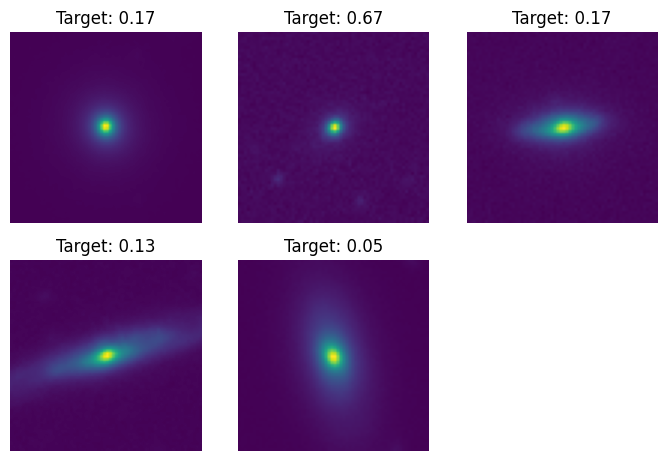

In [88]:
indices = np.random.choice(len(X), 5, replace=False)

fig = plt.figure(figsize=(7,7))
for i, idx in enumerate(indices):
    ax=fig.add_subplot(3, 3, i + 1)
    ax.imshow(X[idx])
    ax.set_title(f'Target: {y[idx]:.2f}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# **(Q1): MODELLO CNN**

In [89]:
# prompt: Scrivi una classe di una rete CNN capace di riconoscere la classe delle images. definisci solo la classe.

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        # Calculate the size of the flattened layer dynamically
        # After two pooling layers with stride 2, the spatial dimensions become 64/4 = 16
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        # x = x.unsqueeze(1)  # Remove this line
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()

In [90]:
from torchsummary import summary
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
summary(model, (1,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             320
              ReLU-2           [-1, 32, 64, 64]               0
         MaxPool2d-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          18,496
              ReLU-5           [-1, 64, 32, 32]               0
         MaxPool2d-6           [-1, 64, 16, 16]               0
           Flatten-7                [-1, 16384]               0
            Linear-8                  [-1, 128]       2,097,280
              ReLU-9                  [-1, 128]               0
           Linear-10                    [-1, 1]             129
Total params: 2,116,225
Trainable params: 2,116,225
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 3.50
Params size (MB): 8.07
Estimat

In [93]:
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)#.to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)#.to(device)

dataset = TensorDataset(X_tensor, y_tensor)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

nuovo

Epoch [1/20], Train Loss: 0.2108, Val Loss: 0.1575
Epoch [2/20], Train Loss: 0.1444, Val Loss: 0.1419
Epoch [3/20], Train Loss: 0.1276, Val Loss: 0.1255
Epoch [4/20], Train Loss: 0.1221, Val Loss: 0.1271
Epoch [5/20], Train Loss: 0.1168, Val Loss: 0.1259
Epoch [6/20], Train Loss: 0.1140, Val Loss: 0.1135
Epoch [7/20], Train Loss: 0.1079, Val Loss: 0.1150
Epoch [8/20], Train Loss: 0.1037, Val Loss: 0.1076
Epoch [9/20], Train Loss: 0.1013, Val Loss: 0.1100
Epoch [10/20], Train Loss: 0.0991, Val Loss: 0.1069
Epoch [11/20], Train Loss: 0.0970, Val Loss: 0.1108
Epoch [12/20], Train Loss: 0.0945, Val Loss: 0.1066
Epoch [13/20], Train Loss: 0.0932, Val Loss: 0.1044
Epoch [14/20], Train Loss: 0.0938, Val Loss: 0.1232
Epoch [15/20], Train Loss: 0.0927, Val Loss: 0.1108
Epoch [16/20], Train Loss: 0.0905, Val Loss: 0.1070
Early stopping after 3 epochs without improvement.


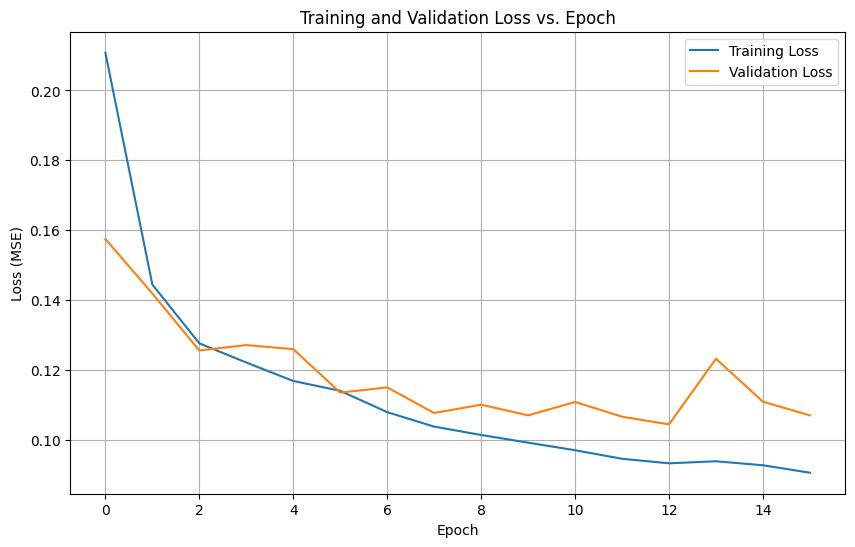

R-squared on Validation Set: 0.6853
Mean Squared Error on Validation Set: 0.1044


In [94]:
import torch
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

num_epochs = 20
best_val_loss = float('inf')
epochs_without_improvement = 0
patience = 3

train_losses = []
val_losses = []

# Memorizza qui i pesi migliori
best_model_wts = copy.deepcopy(model.state_dict())

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * inputs.size(0)

    epoch_train_loss = running_train_loss / len(train_dataloader.dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item() * inputs.size(0)

    epoch_val_loss = running_val_loss / len(val_dataloader.dataset)
    val_losses.append(epoch_val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

    # Controlla se abbiamo un nuovo best
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        epochs_without_improvement = 0
        best_model_wts = copy.deepcopy(model.state_dict())       # salva i pesi migliori in memoria
        torch.save(best_model_wts, 'best_model.pth')             # opzionale: salva su disco
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f'Early stopping after {patience} epochs without improvement.')
            break

# Ripristina i pesi migliori
model.load_state_dict(best_model_wts)

# Plot delle curve di loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Valutazione finale sul set di validazione
model.eval()
with torch.no_grad():
    predictions = []
    true_targets = []
    for inputs, targets in val_dataloader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        predictions.extend(outputs.cpu().numpy().flatten())
        true_targets.extend(targets.cpu().numpy().flatten())

r2 = r2_score(true_targets, predictions)
mse = mean_squared_error(true_targets, predictions)

print(f'R-squared on Validation Set: {r2:.4f}')
print(f'Mean Squared Error on Validation Set: {mse:.4f}')

vecchio

Epoch [1/20], Train Loss: 0.2584, Val Loss: 0.1416
Epoch [2/20], Train Loss: 0.1481, Val Loss: 0.1237
Epoch [3/20], Train Loss: 0.1378, Val Loss: 0.1263
Epoch [4/20], Train Loss: 0.1250, Val Loss: 0.1131
Epoch [5/20], Train Loss: 0.1179, Val Loss: 0.1149
Epoch [6/20], Train Loss: 0.1157, Val Loss: 0.1024
Epoch [7/20], Train Loss: 0.1120, Val Loss: 0.1015
Epoch [8/20], Train Loss: 0.1089, Val Loss: 0.0991
Epoch [9/20], Train Loss: 0.1067, Val Loss: 0.1018
Epoch [10/20], Train Loss: 0.1043, Val Loss: 0.0954
Epoch [11/20], Train Loss: 0.1021, Val Loss: 0.1059
Epoch [12/20], Train Loss: 0.1045, Val Loss: 0.0991
Epoch [13/20], Train Loss: 0.1005, Val Loss: 0.0958
Early stopping after 3 epochs without improvement.


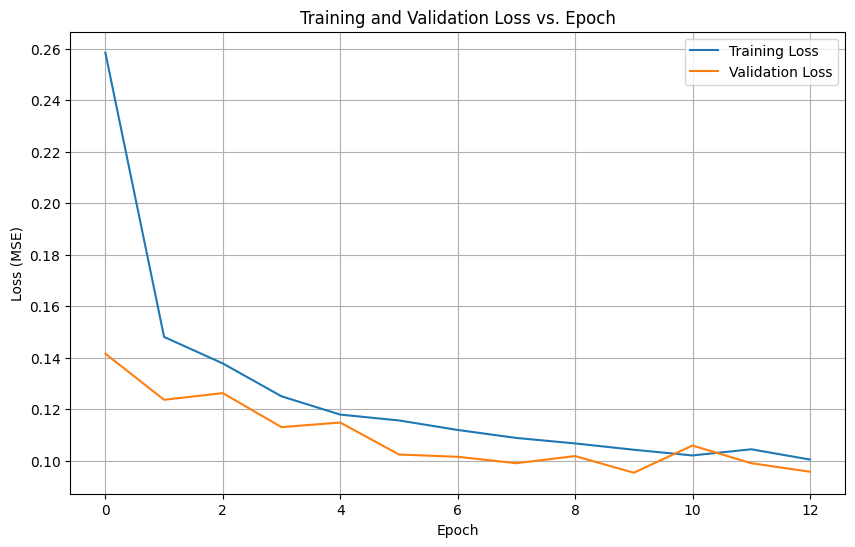

R-squared on Validation Set: 0.6815
Mean Squared Error on Validation Set: 0.0958


In [77]:
#AGGIUNGI ACCURACY
num_epochs = 20
best_val_loss = float('inf')
epochs_without_improvement = 0
patience = 3

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * inputs.size(0)

    epoch_train_loss = running_train_loss / len(train_dataloader.dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item() * inputs.size(0)

    epoch_val_loss = running_val_loss / len(val_dataloader.dataset)
    val_losses.append(epoch_val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f'Early stopping after {patience} epochs without improvement.')
            break

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

model.eval()
with torch.no_grad():
    predictions = []
    true_targets = []
    for inputs, targets in val_dataloader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        predictions.extend(outputs.cpu().numpy().flatten())
        true_targets.extend(targets.cpu().numpy().flatten())

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(true_targets, predictions)
mse = mean_squared_error(true_targets, predictions)

print(f'R-squared on Validation Set: {r2:.4f}')
print(f'Mean Squared Error on Validation Set: {mse:.4f}')

# Comment on results:
# This section would include analysis of the R-squared and MSE values,
# observation of the training and validation loss curves (whether they converge,
# diverge indicating overfitting, etc.), and a comparison to expected performance.
# The early stopping mechanism helps prevent overfitting by monitoring
# the validation loss. The plot will show how well the model generalizes.


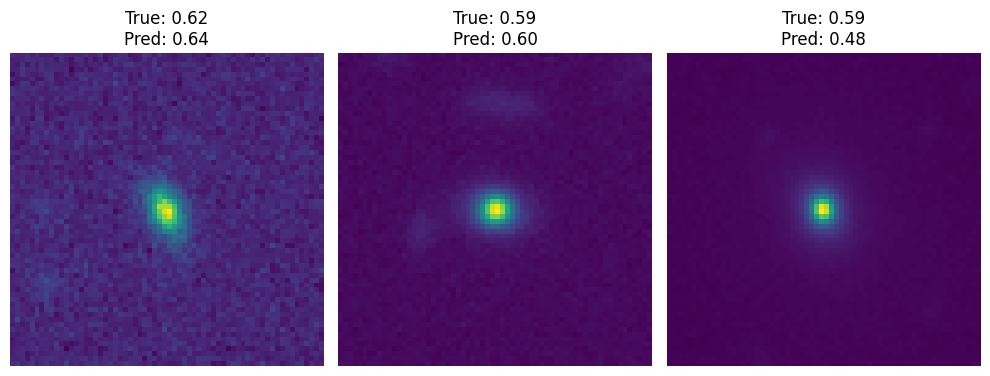

In [97]:
# prompt: Prendi tre immages a caso, utilizza il modello allenato per vedere se il target predetto con CNN  corrisponde con quello vero

import matplotlib.pyplot as plt
import random

model.eval() # Set the model to evaluation mode

# Select 3 random indices from the validation dataset
random_indices = random.sample(range(len(val_dataset)), 3)

plt.figure(figsize=(10, 4))

for i, data_index in enumerate(random_indices):
    # Get the image and true target from the validation dataset
    image, true_target = val_dataset[data_index]

    # Move both image and true_target to the device
    image = image.to(device)
    true_target = true_target.to(device)

    # Add a batch dimension to the image
    input_image = image.unsqueeze(0)

    # Get the prediction from the trained model
    with torch.no_grad():
        predicted_target = model(input_image).item()

    # Plot the image
    ax = plt.subplot(1, 3, i + 1)
    # Remove the channel dimension for plotting
    ax.imshow(image.squeeze(0).cpu().numpy(), cmap='viridis')
    ax.set_title(f'True: {true_target.item():.2f}\nPred: {predicted_target:.2f}')
    ax.axis('off')

plt.tight_layout()
plt.show()